In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, QuantumCircuit,BasicAer
from qiskit.visualization import *
from numpy import *


In [19]:
# qreg=QuantumRegister(2)
for i in range(5):
    qc = QuantumCircuit(2)
    # qc.ry(pi/2,0)
    qc.h([0])
    # qc.h(0)
    qc.measure_all()
    qc.draw('mpl')
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend=backend, shots=1000)
    results = job.result().get_counts()
    print(results)
    # qc.draw('mpl')
    qc.draw(output='mpl',filename="E:\桌面\Bell_pic\\"+str(i)+".jpg")


{'00': 505, '01': 495}
{'00': 525, '01': 475}
{'00': 494, '01': 506}
{'00': 486, '01': 514}
{'01': 489, '00': 511}


{'0000': 250, '0001': 237, '0111': 274, '0110': 239}


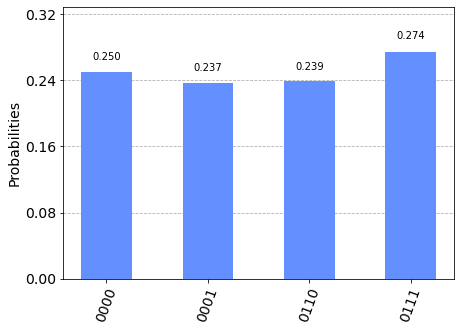

In [31]:
quantum = QuantumCircuit(4)
quantum.h([0, 1])
quantum.cx(0, 1)
quantum.cx(1,2)
quantum.measure_all()
backend = Aer.get_backend('qasm_simulator')
job = execute(quantum, backend=backend, shots=1000)
results = job.result().get_counts()
print(results)
plot_histogram(results)
# quantum.draw('mpl')


In [1]:
# 格式化代码：alt+shift+f

from qiskit.execute_function import transpile


cric = QuantumCircuit(3)
cric.h(0)
cric.cx(0, 1)
cric.cx(1, 2)
cric.cx(0,2)

meas = QuantumCircuit(3, 3)
meas.barrier(range(3))

meas.measure(range(3), range(3))
# meas.measure(0,range(3))

cric.add_register(meas.cregs[0])
qc = cric.compose(meas)



backend = Aer.get_backend('qasm_simulator')
# job_sim = backend.run(transpile(qc, backend), shot=1024)
job_sim = execute(qc, backend=backend, shots=1024)
result = job_sim.result().get_counts()
print(result)
legend = ['First execution', 'Second execution']
# plot_histogram([result, results], legend=legend)
plot_histogram(data=[result,results],legend=legend,sort='desc',title='result')
# qc.draw('mpl')

NameError: name 'QuantumCircuit' is not defined

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


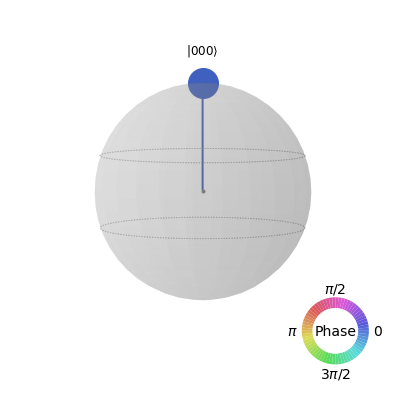

In [33]:
qc_state=QuantumCircuit(3)
# qc_state.h(0)
qc_state.cx(0,1)
backend_state=BasicAer.get_backend('statevector_simulator')
job = backend_state.run(qc_state)
result = job.result()
outputstate = result.get_statevector(qc_state, decimals=3)
print(outputstate)
# state=job_sim.result().get_statevector(qc,decimals=3)
# print(state)
plot_state_city(outputstate)
plot_state_hinton(outputstate)
plot_state_qsphere(outputstate)

In [ ]:
from qiskit.circuit.measure import measure
from qiskit.pulse import measure_all


q = QuantumRegister(10, name='q')
c = ClassicalRegister(10, name='c')
rs = QuantumCircuit(q, c, name='rs')

# create temp_n number of qubits all in superpositions
for i in range(10):
    rs.h(q[i])  # the .h gate is the Hadamard gate that makes superpositions
    if i<9:
        rs.cx(q[0],q[i+1])

rs.measure_all()
# for i in range(10):
#     rs.


backend=Aer.get_backend('qasm_simulator')
result = execute(rs, backend, shots=1000).result()
counts = result.get_counts(rs)
result_key = list(result.get_counts(rs).keys())
# print(counts)
rs.draw('mpl')

{'11': 55, '00': 45}


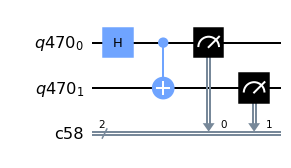

In [78]:

q1=QuantumRegister(2)
c1=ClassicalRegister(2)
qc_t1=QuantumCircuit(q1,c1)
qc_t1.h(q1[0])
qc_t1.cx(q1[0],q1[1])
# qc_t1.measure_all()
qc_t1.measure(0,c1[0])
qc_t1.measure(1,c1[1])
# qc_t1.measure()
backend=Aer.get_backend('qasm_simulator')
count_t1=execute(qc_t1,backend=backend,shots=100).result().get_counts()
print(count_t1)
qc_t1.draw('mpl')